# Credit Card Fraud

This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.

## PROJECT MEMBERS
Shouro Shuvit,
Clarissa Cemer,
Karam Haddad,
and Wesley Fletcher

In [19]:
# CELL 1

# This is the original unfiltered Credit Card Dataset
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import plotly.graph_objects as go
df = pd.read_csv('credit_card_fraud.csv') 
df

trans_date_trans_time                   merchant  ...  merch_long  is_fraud
0        2019-01-01 00:00:44  Heller, Gutmann and Zieme  ... -118.186462         0
1        2019-01-01 00:00:51             Lind-Buckridge  ... -112.154481         0
2        2019-01-01 00:07:27                  Kiehn Inc  ... -122.230347         0
3        2019-01-01 00:09:03                Beier-Hyatt  ... -106.520205         0
4        2019-01-01 00:21:32                 Bruen-Yost  ... -111.454923         0
...                      ...                        ...  ...         ...       ...
339602   2020-12-31 23:57:56             Schmidt-Larkin  ... -165.186033         0
339603   2020-12-31 23:58:04  Pouros, Walker and Spence  ... -123.553032         0
339604   2020-12-31 23:59:07            Reilly and Sons  ...  -91.333331         0
339605   2020-12-31 23:59:15                  Rau-Robel  ... -119.715054         0
339606   2020-12-31 23:59:24            Breitenberg LLC  ... -117.080888         0

[339607 rows x 15 columns]

## Data Dictionary

| transdatetrans_time | Transaction DateTime                        |
|---------------------|---------------------------------------------|
| merchant            | Merchant Name                               |
| category            | Category of Merchant                        |
| amt                 | Amount of Transaction                       |
| city                | City of Credit Card Holder                  |
| state               | State of Credit Card Holder                 |
| lat                 | Latitude Location of Purchase               |
| long                | Longitude Location of Purchase              |
| city_pop            | Credit Card Holder's City Population        |
| job                 | Job of Credit Card Holder                   |
| dob                 | Date of Birth of Credit Card Holder         |
| trans_num           | Transaction Number                          |
| merch_lat           | Latitude Location of Merchant               |
| merch_long          | Longitude Location of Merchant              |
| is_fraud            | Whether Transaction is Fraud (1) or Not (0) |

In [20]:
# CELL 2

# This Cell shows the different dtypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

It would be a good idea to get a count of how many cities and states have transaction data within our dataframe:

In [21]:
# CELL 3

print('There are', df['city'].nunique(), 'cities that have transaction data and', df['state'].nunique(), 'states that have transaction data.')
print('Furthermore, we can visualize how many cities have transaction data within each of the 13 states:')
city_count_per_state = df.groupby('state')['city'].nunique()
print(city_count_per_state)

There are 176 cities that have transaction data and 13 states that have transaction data.
Furthermore, we can visualize how many cities have transaction data within each of the 13 states:
state
AK     4
AZ     6
CA    40
CO    12
HI     2
ID     4
MO    30
NE    19
NM    12
OR    18
UT     7
WA    12
WY    11
Name: city, dtype: int64


There are a few predictors that could be useful to takes means of, such as city population, transaction amount, and fraud classification:

In [22]:
# CELL 4

df.describe()

amt            lat  ...     merch_long       is_fraud
count  339607.000000  339607.000000  ...  339607.000000  339607.000000
mean       70.577984      39.718991  ...    -110.622383       0.005247
std       161.675242       5.094961  ...      12.663998       0.072248
min         1.000000      20.027100  ...    -166.671575       0.000000
25%         9.600000      36.715400  ...    -119.823755       0.000000
50%        46.460000      39.617100  ...    -111.036443       0.000000
75%        83.350000      41.710000  ...    -100.353096       0.000000
max     28948.900000      66.693300  ...     -88.629203       1.000000

[8 rows x 7 columns]

Here, we can see that the mean value of is_fraud is 0.0052472417, so about 1 in 200 transactions in this dataset are fraudulent. Additionally, the mean population of the present cities is about one hundred thousand, and the mean transaction amount is about seventy dollars.

Before performing more in-depth analysis, we should check the dataset for null and missing information:

In [23]:
# CELL 5

df.isnull().any()

trans_date_trans_time    False
merchant                 False
category                 False
amt                      False
city                     False
state                    False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
trans_num                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

Since no null values are present in the dataset, we don't have to worry about cleaning them out.

One data feature that might prove useful is the accumulated population of all cities in the state where the transaction took place:

In [24]:
# CELL 6

# Group the dataframe by 'state' and calculate the sum of 'city_pop' for each state
state_population_sum = df.groupby('state')['city_pop'].transform('sum')

# Append this new column to the dataframe
df['state_pop_sum'] = state_population_sum
df.head()

trans_date_trans_time                   merchant  ... is_fraud  state_pop_sum
0   2019-01-01 00:00:44  Heller, Gutmann and Zieme  ...        0      482653182
1   2019-01-01 00:00:51             Lind-Buckridge  ...        0      312730763
2   2019-01-01 00:07:27                  Kiehn Inc  ...        0    15382576759
3   2019-01-01 00:09:03                Beier-Hyatt  ...        0     1077932797
4   2019-01-01 00:21:32                 Bruen-Yost  ...        0      273655140

[5 rows x 16 columns]

With this new data feature, we can now better examine the data at the state level.

Of the data features present, the most likely correlated from intuition would be the merchant category, value of transaction, and fraud classification of each transaction:

In [25]:
# CELL 7

# Create a dataframe containing only data on merchant category, transaction amount, and fraud classification
purchase = df[['category','amt','is_fraud']]
purchase

category     amt  is_fraud
0          grocery_pos  107.23         0
1        entertainment  220.11         0
2          grocery_pos   96.29         0
3         shopping_pos    7.77         0
4             misc_pos    6.85         0
...                ...     ...       ...
339602            home   12.68         0
339603       kids_pets   13.02         0
339604  health_fitness   43.77         0
339605       kids_pets   86.88         0
339606          travel    7.99         0

[339607 rows x 3 columns]

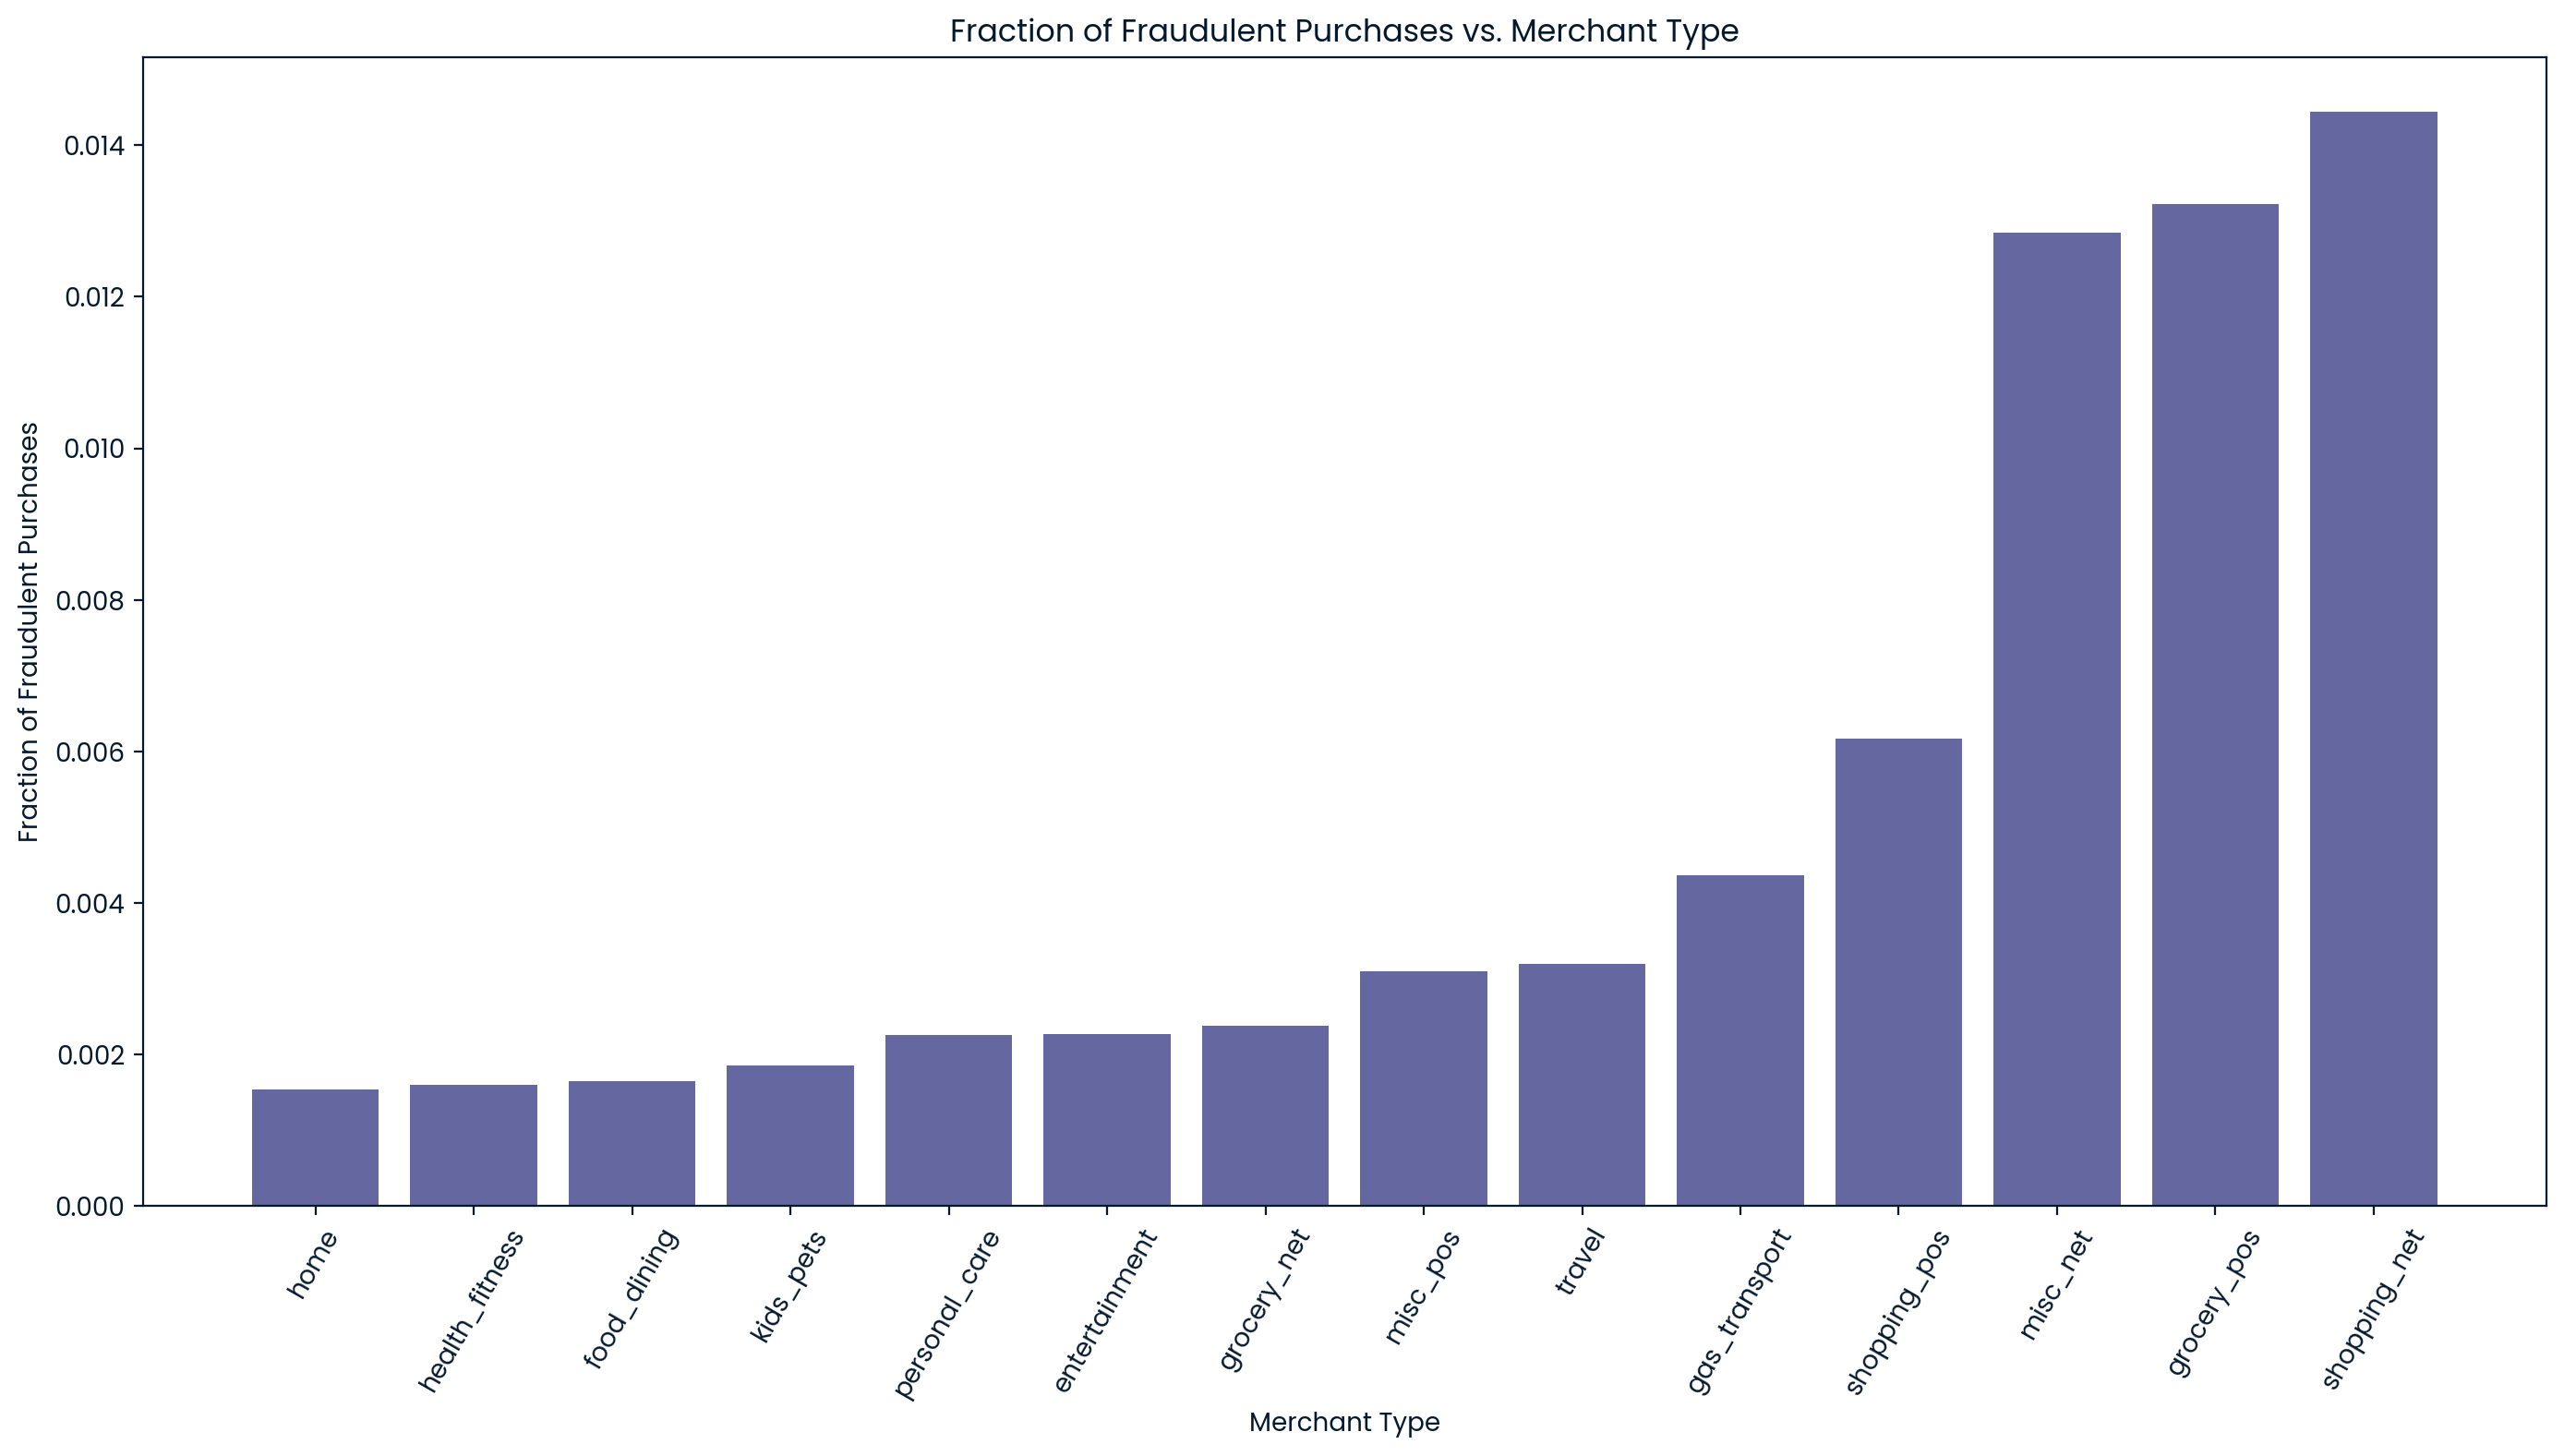

In [26]:
# CELL 8

# Adjusting the metrics
fraudulent_purchases_per_category = purchase.groupby('category')['is_fraud'].mean().sort_values()

# Making the bar plot without seaborn
plt.figure(figsize=(14, 8))

# Making the bar graph of fraudulent purchase proportions
plt.bar(fraudulent_purchases_per_category.index, fraudulent_purchases_per_category.values)

plt.xticks(rotation=60)
plt.ylabel('Fraction of Fraudulent Purchases')
plt.xlabel('Merchant Type')
plt.title('Fraction of Fraudulent Purchases vs. Merchant Type')
plt.tight_layout()
plt.show()

From the bar graph, we can see that general shopping and groceries purchases are significantly more likely to be fraudulent with respect to the number of purchases for their respective categories.

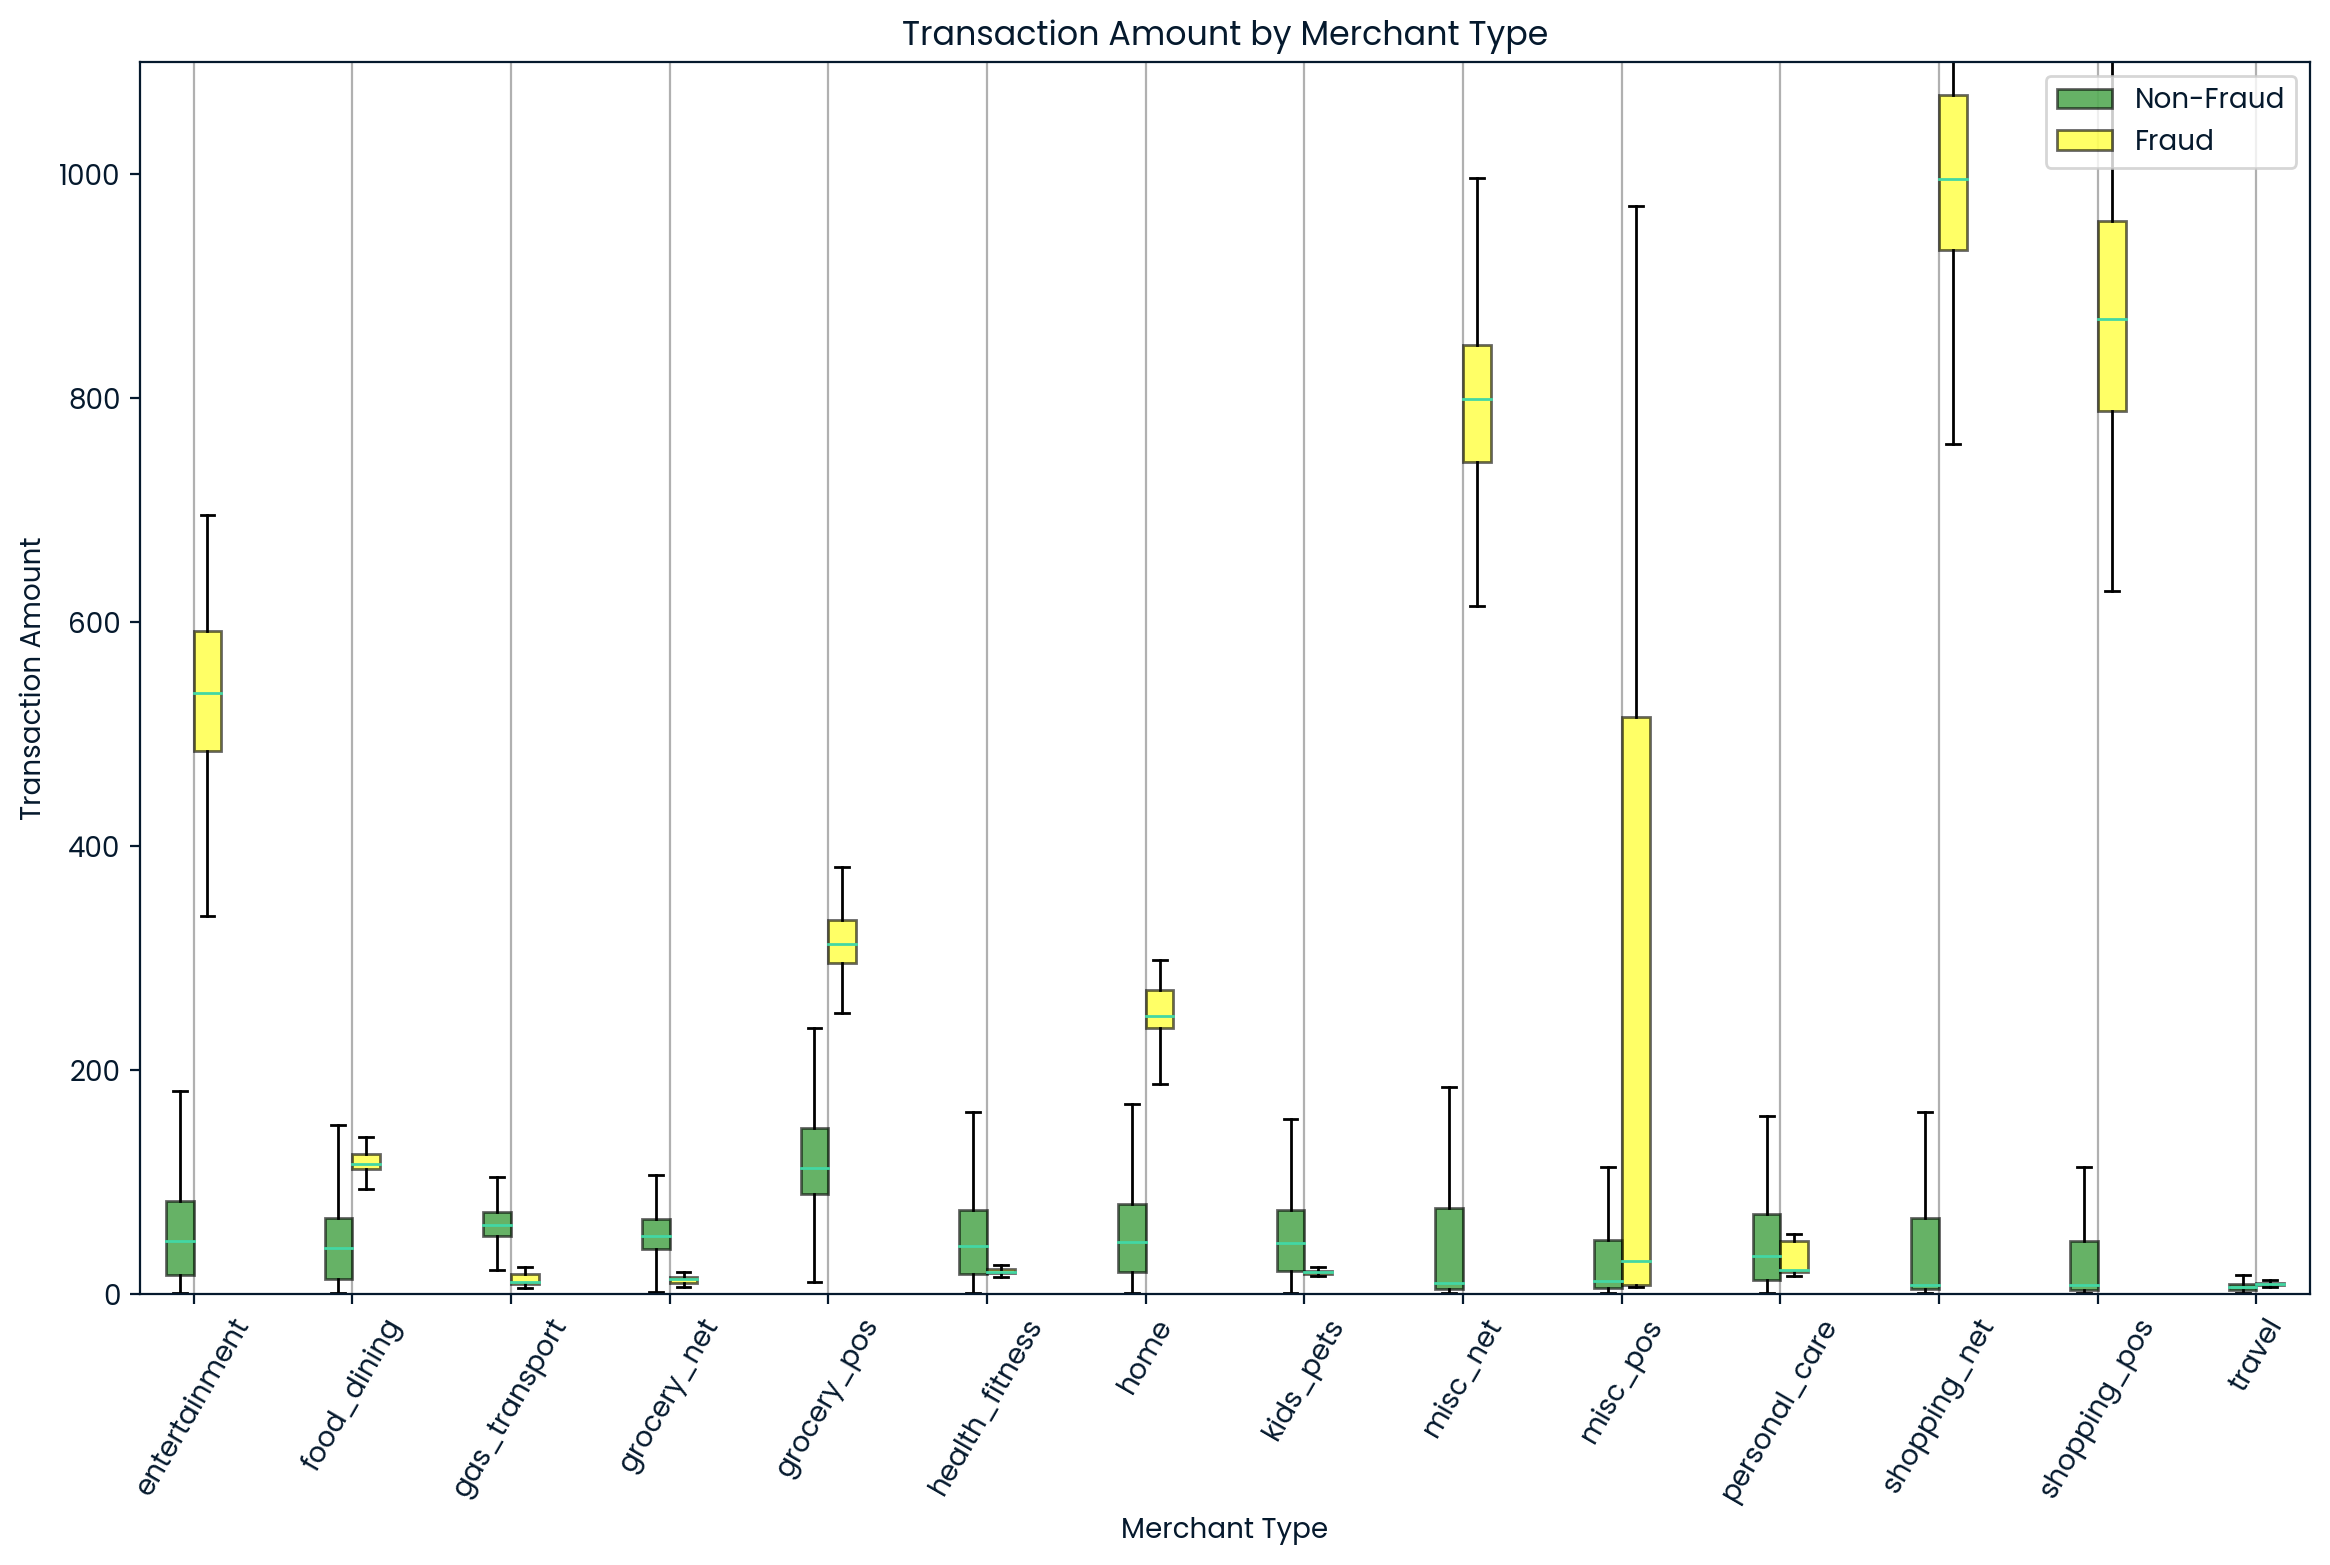

In [27]:
# CELL 9

# Preparing data for plotting
categories = purchase['category'].unique()
categories.sort()  # Sorting categories alphabetically, replace this with the order you need

# Splitting data by fraud status
fraud_data = purchase[purchase['is_fraud'] == 1]
non_fraud_data = purchase[purchase['is_fraud'] == 0]

# Collecting transaction amounts for plotting
fraud_amounts = [fraud_data[fraud_data['category'] == category]['amt'].values for category in categories]
non_fraud_amounts = [non_fraud_data[non_fraud_data['category'] == category]['amt'].values for category in categories]

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
positions = np.arange(len(categories)) * 2  # Positioning for each category group
width = 0.35  # Width of the bars

# Boxplot for non-fraud transactions
bp1 = ax.boxplot(non_fraud_amounts, positions=positions - width/2, widths=width, patch_artist=True, showfliers=False)
for patch in bp1['boxes']:
    patch.set_facecolor('green')  # Changed color for better contrast
    patch.set_alpha(0.6)  # Adjusted alpha for better visibility

# Boxplot for fraud transactions
bp2 = ax.boxplot(fraud_amounts, positions=positions + width/2, widths=width, patch_artist=True, showfliers=False)
for patch in bp2['boxes']:
    patch.set_facecolor('yellow')  # Changed color for better contrast
    patch.set_alpha(0.6)  # Adjusted alpha for better visibility

# Customizing the plot
ax.set_xticks(positions)
ax.set_xticklabels(categories, rotation=60)
ax.set_ylabel('Transaction Amount')
ax.set_xlabel('Merchant Type')
ax.set_title('Transaction Amount by Merchant Type')
ax.set_ylim(0, 1100)
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Non-Fraud', 'Fraud'], loc='upper right')

plt.grid(axis='x')

plt.show()

Here, we can see that fraudulent purchases within high fraud categories are generally more expensive purchases. This suggests that someone is more likely to commit fraud on more expensive purchases. Some of the bars in the bar graph also may appear more squished because purchaces in these categories most likely tend to be around the same pricepoint and the amount of fraud in these categories tend to be relatively low because the fraud may not be worth the hassle. Fraud tends to be more expensive than non fraudulent purchases.

The entertainment, shopping, and miscellaneous categories stand out as significantly greater when fraudulent. We will examine this after getting a better perspective on the overall difference in density between legitimate and fraudulent purchases:

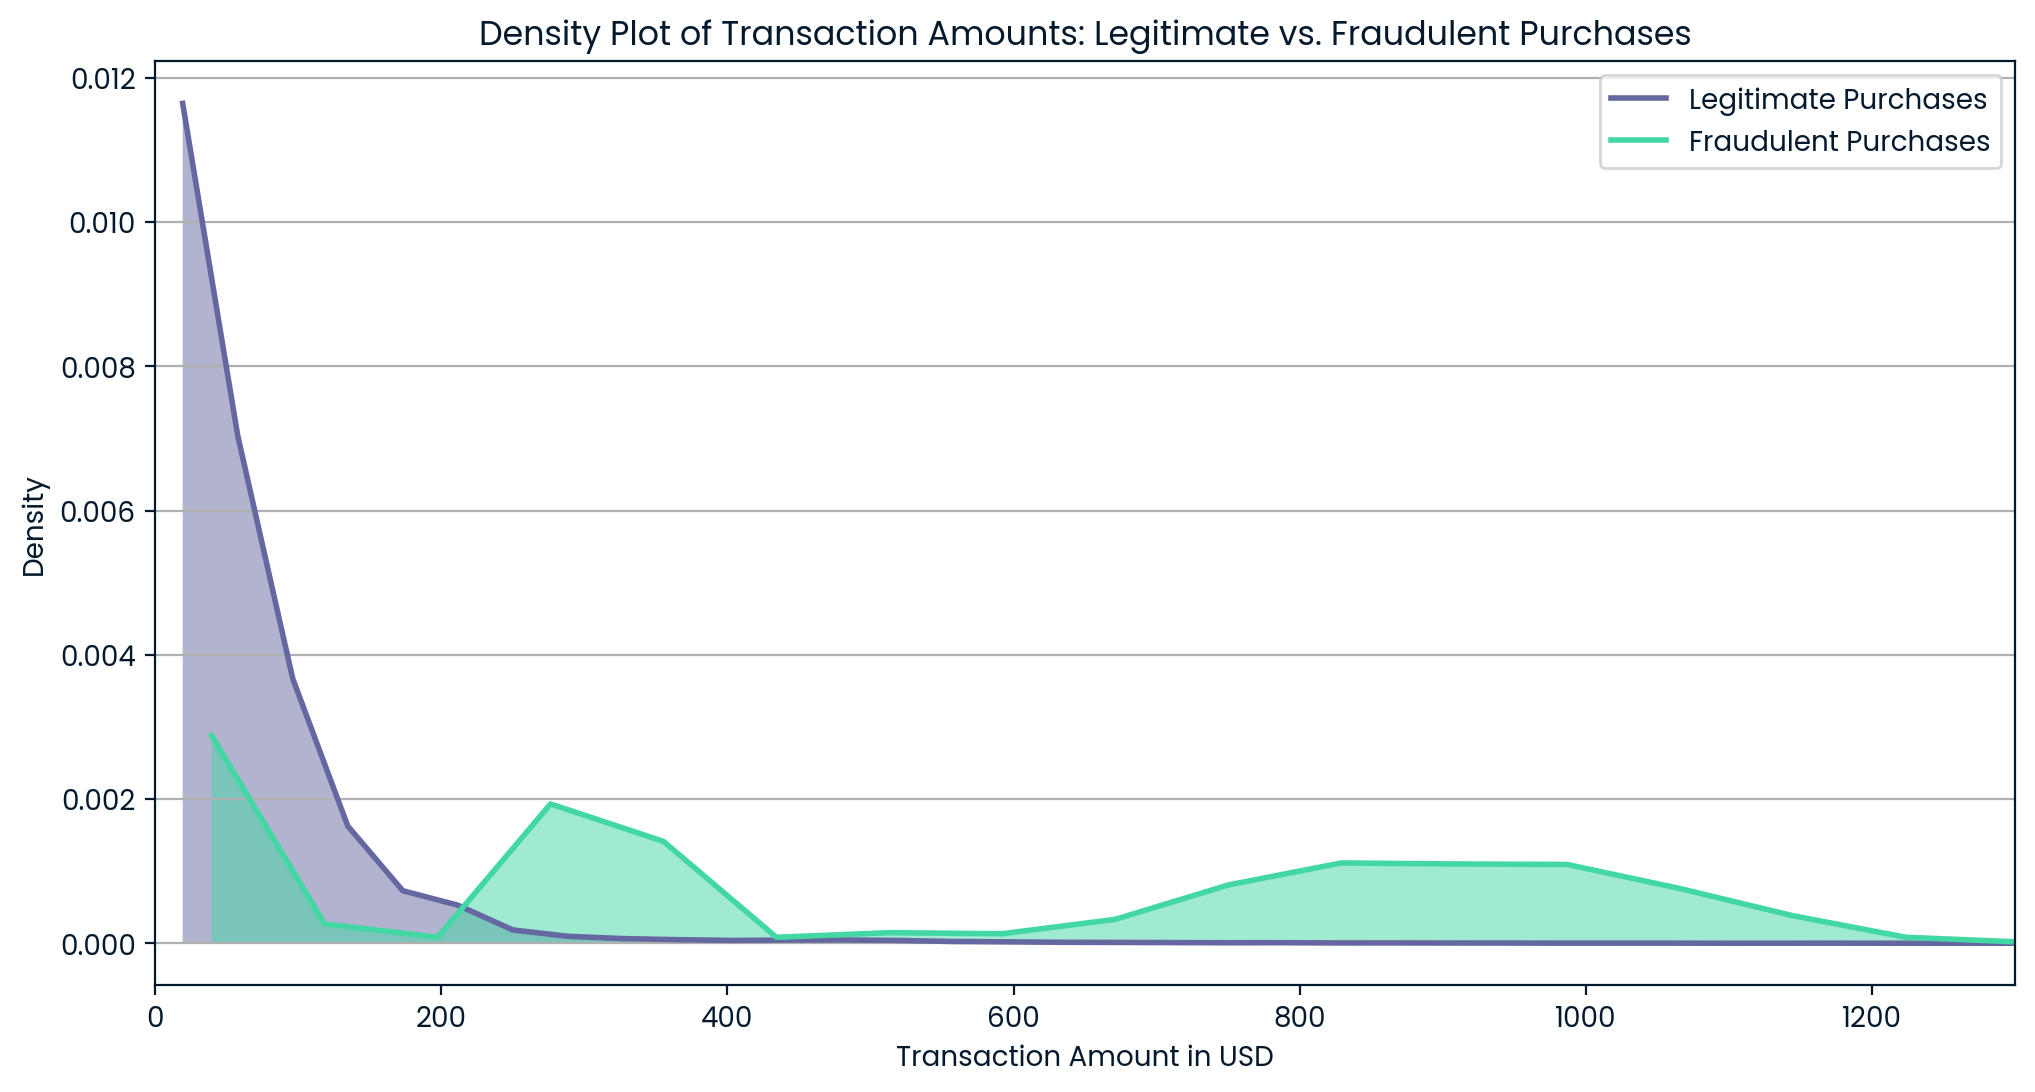

In [28]:
# CELL 10

plt.figure(figsize=(12, 6))

# Calculating densities with a wider range of bins for legitimate transactions to fix the issue
bins_legitimate = np.linspace(0, 1500, 40)  # Increased number of bins for better resolution
bins_fraudulent = np.linspace(0, 1500, 20)  # Keeping fraudulent bins as is for comparison

legitimate = purchase[purchase["is_fraud"] == 0]["amt"]
fraudulent = purchase[purchase["is_fraud"] == 1]["amt"]

legitimate_density = np.histogram(legitimate, bins=bins_legitimate, density=True)
fraudulent_density = np.histogram(fraudulent, bins=bins_fraudulent, density=True)

# Getting the centers of bins
legitimate_bin_centers = 0.5*(legitimate_density[1][1:] + legitimate_density[1][:-1])
fraudulent_bin_centers = 0.5*(fraudulent_density[1][1:] + fraudulent_density[1][:-1])

# Plotting the densities
plt.plot(legitimate_bin_centers, legitimate_density[0], label="Legitimate Purchases", linewidth=2)
plt.fill_between(legitimate_bin_centers, legitimate_density[0], alpha=0.5)
plt.plot(fraudulent_bin_centers, fraudulent_density[0], label="Fraudulent Purchases", linewidth=2)
plt.fill_between(fraudulent_bin_centers, fraudulent_density[0], alpha=0.5)

plt.title('Density Plot of Transaction Amounts: Legitimate vs. Fraudulent Purchases')
plt.xlabel('Transaction Amount in USD')
plt.ylabel('Density')
plt.xlim(0, 1300)  # Adjusting the x-axis to show only transaction amounts between 0 and 1300
plt.legend()
plt.grid(axis='y')  # Drawing a horizontal grid over the plot
plt.show()

Using this overall density plot as a baseline, we'll now investigate the densities category by category, starting with entertainment purchases:

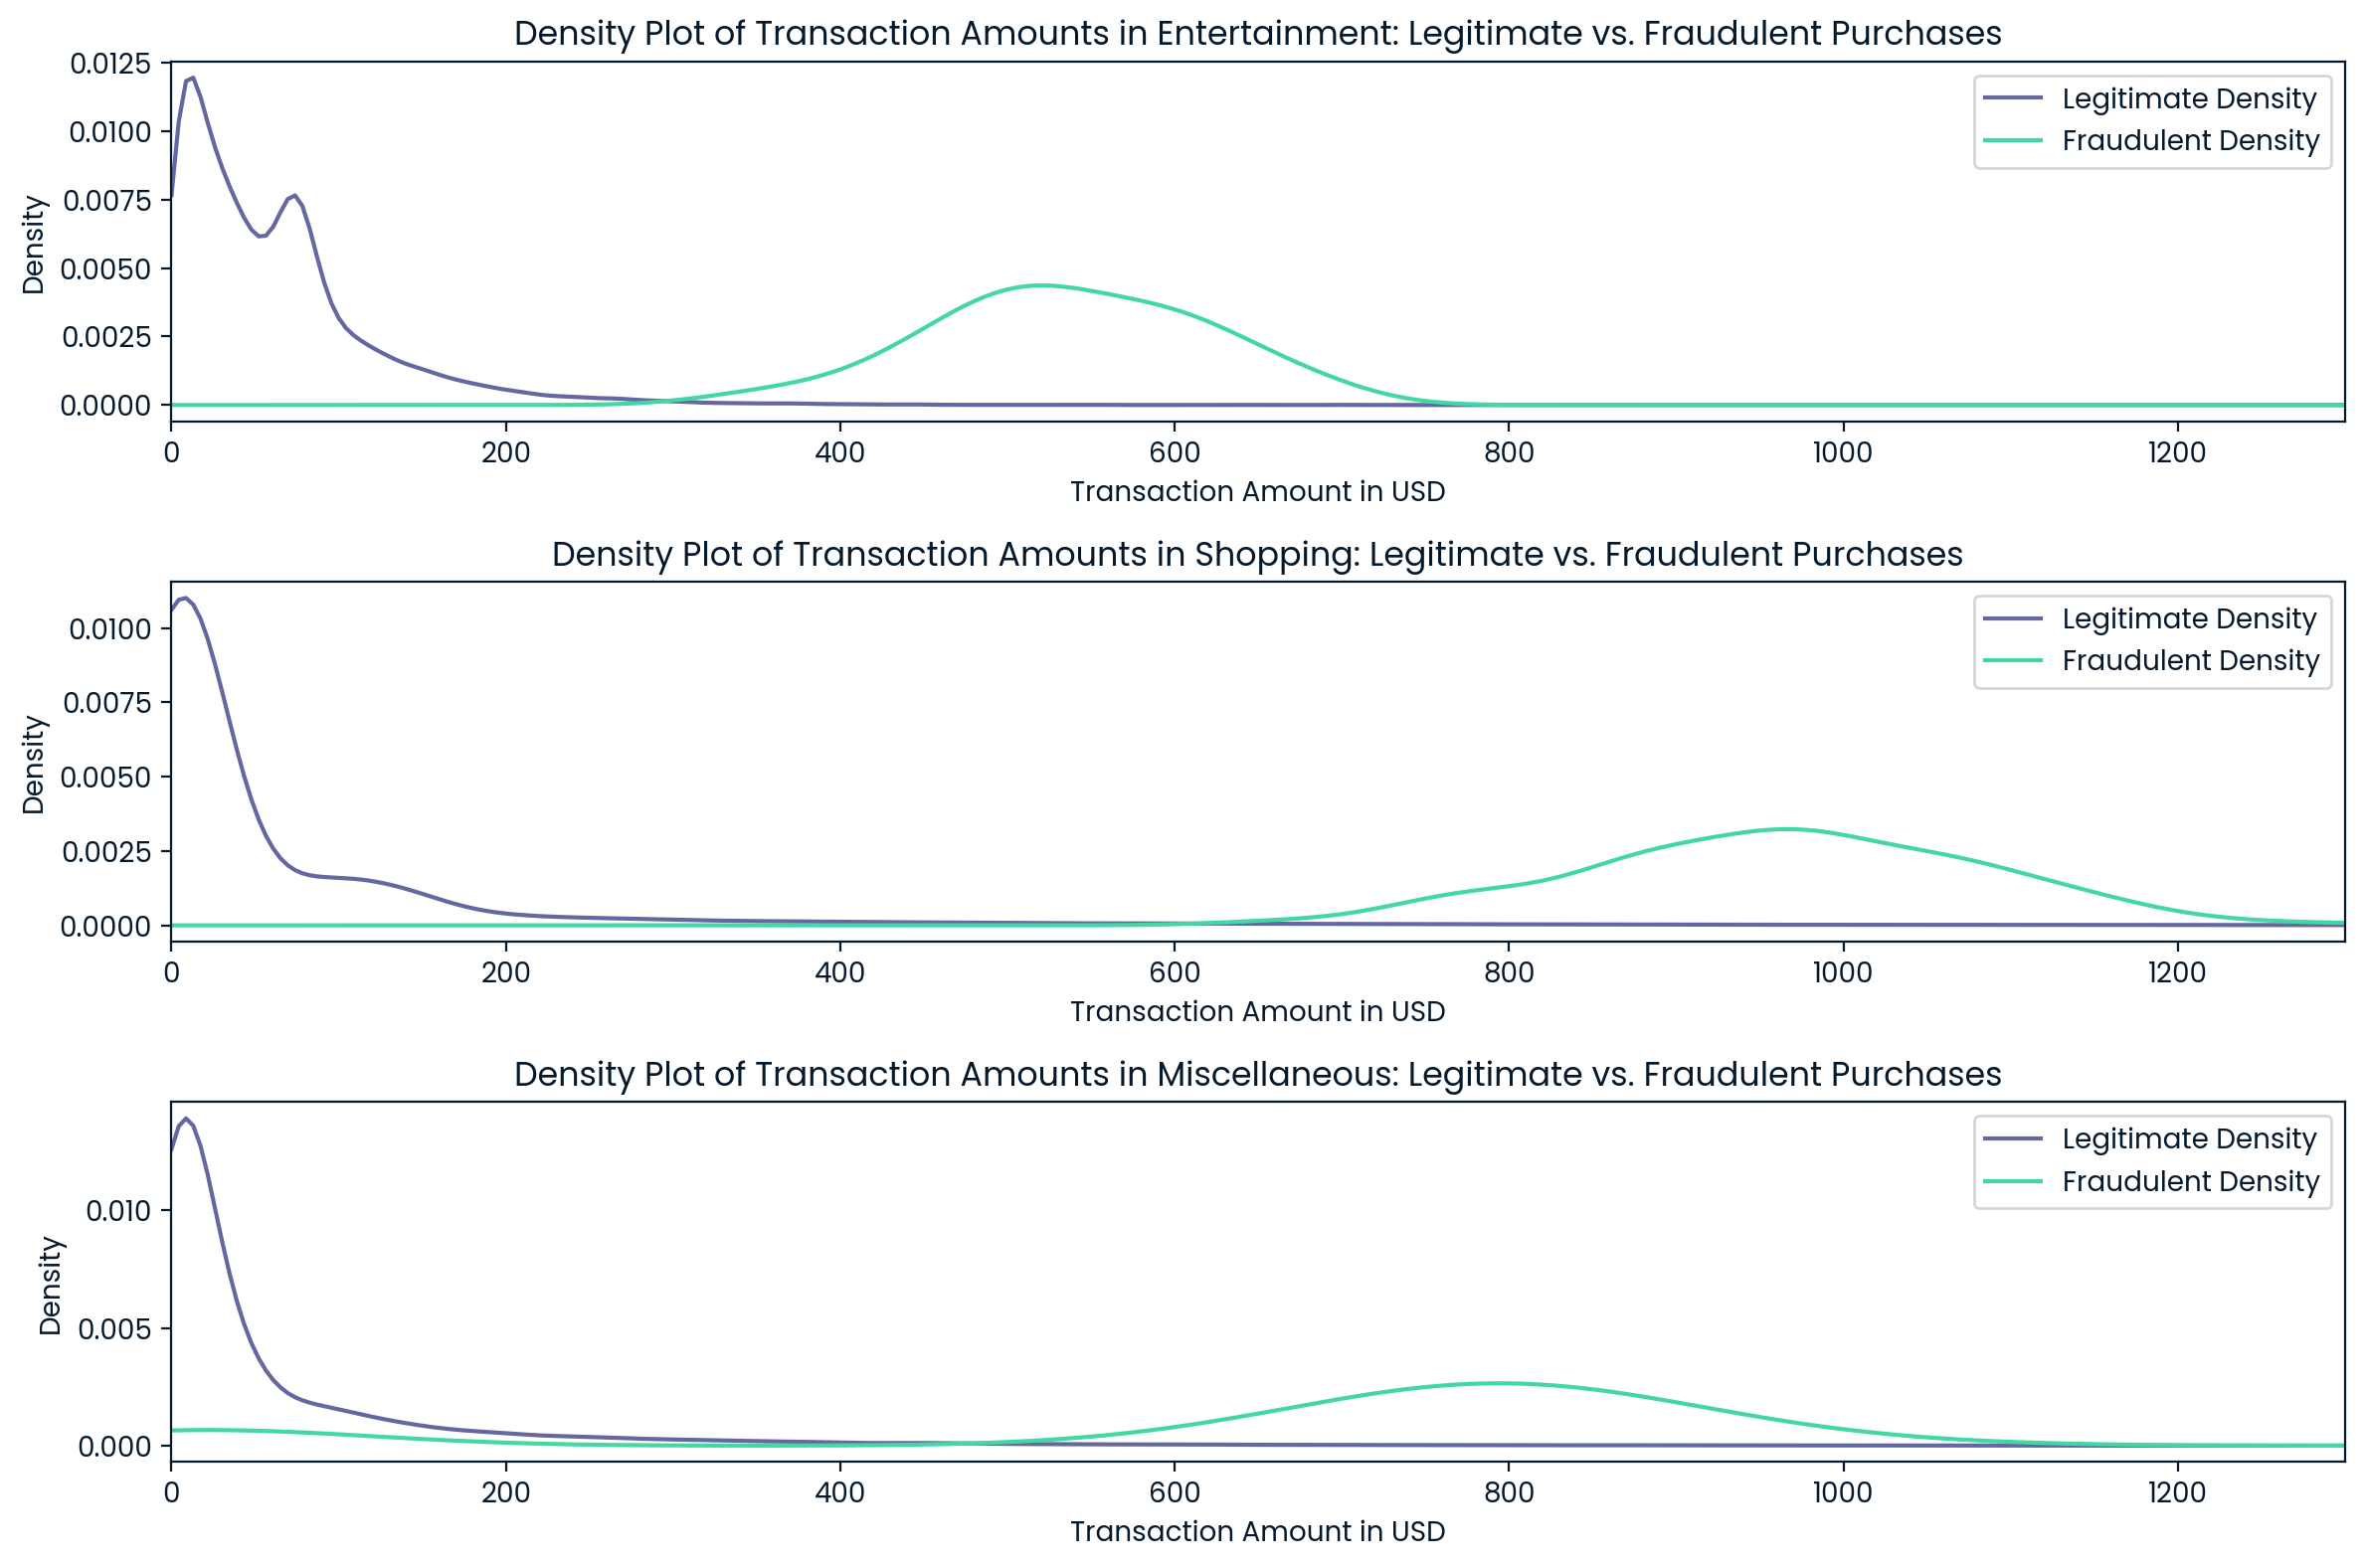

In [29]:
# CELL 11

fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Filtering the 'purchase' dataframe for only 'entertainment' category transactions
entertainment_purchases = purchase[purchase["category"] == "entertainment"]

# Filtering the 'purchase' dataframe for only 'shopping_pos' and 'shopping_net' category transactions
shopping_purchases = purchase[purchase["category"].isin(["shopping_pos", "shopping_net"])]

# Filtering the 'purchase' dataframe for only 'miscellaneous' category transactions
miscellaneous_purchases = purchase[purchase["category"].isin(["misc_pos", "misc_net"])]

# Entertainment Purchases Density Estimation
legit_entertainment = entertainment_purchases[entertainment_purchases["is_fraud"] == 0]["amt"]
fraud_entertainment = entertainment_purchases[entertainment_purchases["is_fraud"] == 1]["amt"]
legit_entertainment_density = gaussian_kde(legit_entertainment)
fraud_entertainment_density = gaussian_kde(fraud_entertainment)
x_legit = np.linspace(0, 1300, 300)
x_fraud = np.linspace(0, 1300, 300)

# Plotting for Entertainment
axs[0].plot(x_legit, legit_entertainment_density(x_legit), label="Legitimate Density")
axs[0].plot(x_fraud, fraud_entertainment_density(x_fraud), label="Fraudulent Density")
axs[0].set_title('Density Plot of Transaction Amounts in Entertainment: Legitimate vs. Fraudulent Purchases')
axs[0].set_xlabel('Transaction Amount in USD')
axs[0].set_ylabel('Density')
axs[0].set_xlim(0, 1300)
axs[0].legend()

# Shopping Purchases Density Estimation
legit_shopping = shopping_purchases[shopping_purchases["is_fraud"] == 0]["amt"]
fraud_shopping = shopping_purchases[shopping_purchases["is_fraud"] == 1]["amt"]
legit_shopping_density = gaussian_kde(legit_shopping)
fraud_shopping_density = gaussian_kde(fraud_shopping)
x_legit_shopping = np.linspace(0, 1300, 300)
x_fraud_shopping = np.linspace(0, 1300, 300)

# Plotting for Shopping
axs[1].plot(x_legit_shopping, legit_shopping_density(x_legit_shopping), label="Legitimate Density")
axs[1].plot(x_fraud_shopping, fraud_shopping_density(x_fraud_shopping), label="Fraudulent Density")
axs[1].set_title('Density Plot of Transaction Amounts in Shopping: Legitimate vs. Fraudulent Purchases')
axs[1].set_xlabel('Transaction Amount in USD')
axs[1].set_ylabel('Density')
axs[1].set_xlim(0, 1300)
axs[1].legend()

# Miscellaneous Purchases Density Estimation
legit_miscellaneous = miscellaneous_purchases[miscellaneous_purchases["is_fraud"] == 0]["amt"]
fraud_miscellaneous = miscellaneous_purchases[miscellaneous_purchases["is_fraud"] == 1]["amt"]
legit_miscellaneous_density = gaussian_kde(legit_miscellaneous)
fraud_miscellaneous_density = gaussian_kde(fraud_miscellaneous)
x_legit_misc = np.linspace(0, 1300, 300)
x_fraud_misc = np.linspace(0, 1300, 300)

# Plotting for Miscellaneous
axs[2].plot(x_legit_misc, legit_miscellaneous_density(x_legit_misc), label="Legitimate Density")
axs[2].plot(x_fraud_misc, fraud_miscellaneous_density(x_fraud_misc), label="Fraudulent Density")
axs[2].set_title('Density Plot of Transaction Amounts in Miscellaneous: Legitimate vs. Fraudulent Purchases')
axs[2].set_xlabel('Transaction Amount in USD')
axs[2].set_ylabel('Density')
axs[2].set_xlim(0, 1300)
axs[2].legend()

plt.tight_layout()
plt.show()

Here, we can see that at about the 300, 600, and 500 dollar values, the density of legitimate purchases is surpassed by fraudulent purchases for their respective categories. Since these dollar values significantly differ, we can conclude that we cannot assume conditional independence between purchase categories, making a Naive Bayes model inapplicable.

Next, since our data includes geographical information on where purchases were made, it may be insightful to plot fraud rates by state:

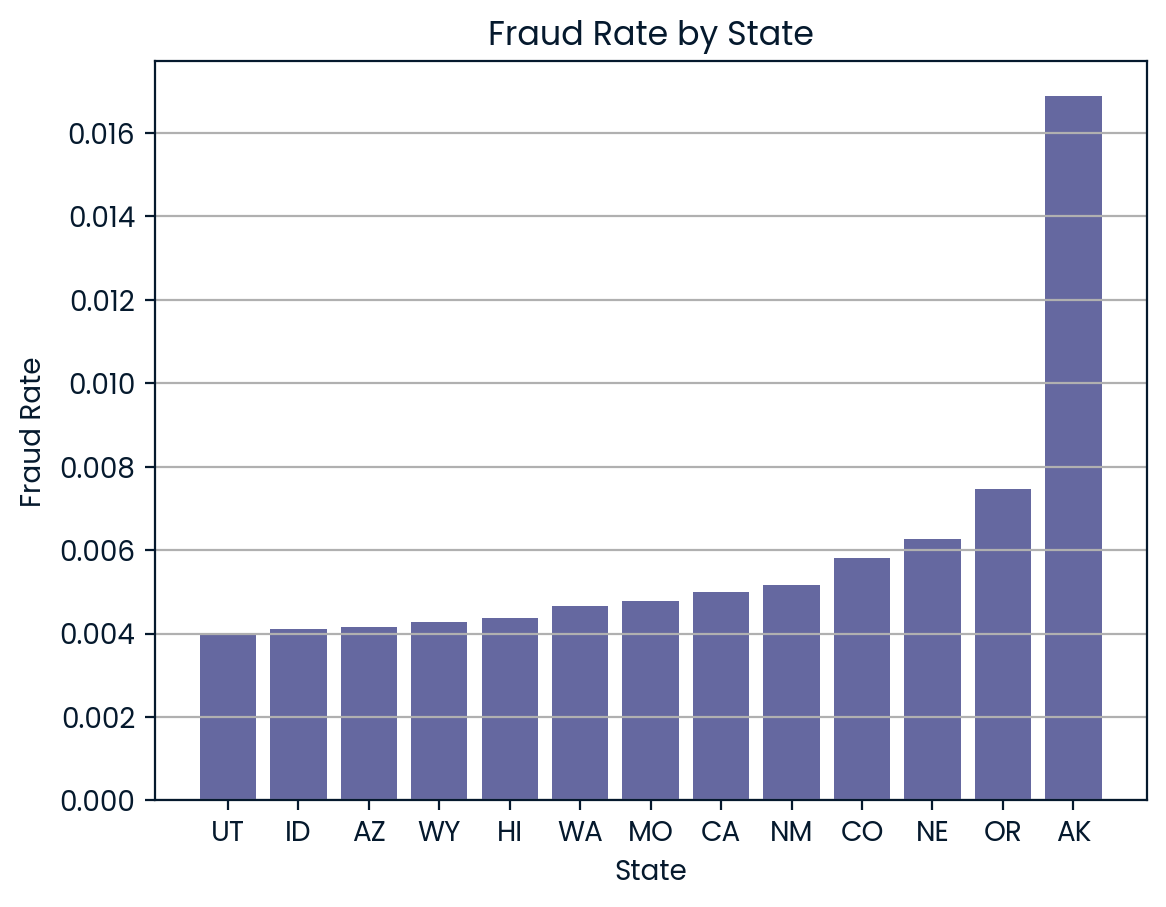

In [30]:
# CELL 12

# Create a dataframe containing only data on the state where the transaction was made and its fraud classification
maps_with_fraud = df[['state', 'is_fraud', 'state_pop_sum']]

# Calculate the rate of fraud for each state
fraud_rate = maps_with_fraud.groupby('state')['is_fraud'].mean().sort_values(ascending=True)

# Plot the rate of frauds to visualize the concentration of fraud rates in ascending order using matplotlib
#plt.figure(figsize=(12, 6))  # Set the figure size for better readability
plt.bar(fraud_rate.index, fraud_rate.values)
plt.title('Fraud Rate by State')  # Adding a title to the plot
plt.xlabel('State')  # Labeling the x-axis
plt.ylabel('Fraud Rate')  # Labeling the y-axis
plt.xticks(rotation=0)  # Rotating x-axis labels to make them readable
plt.grid(axis='y')  # Drawing a horizontal grid over the plot
plt.show()

The astronomical fraud rate of Alaska suggests that our dataset may have issues regarding transactions in Alaska, namely that there may be very few transactions from the state which resulted in this surprising statistic. We investigate this concern below:

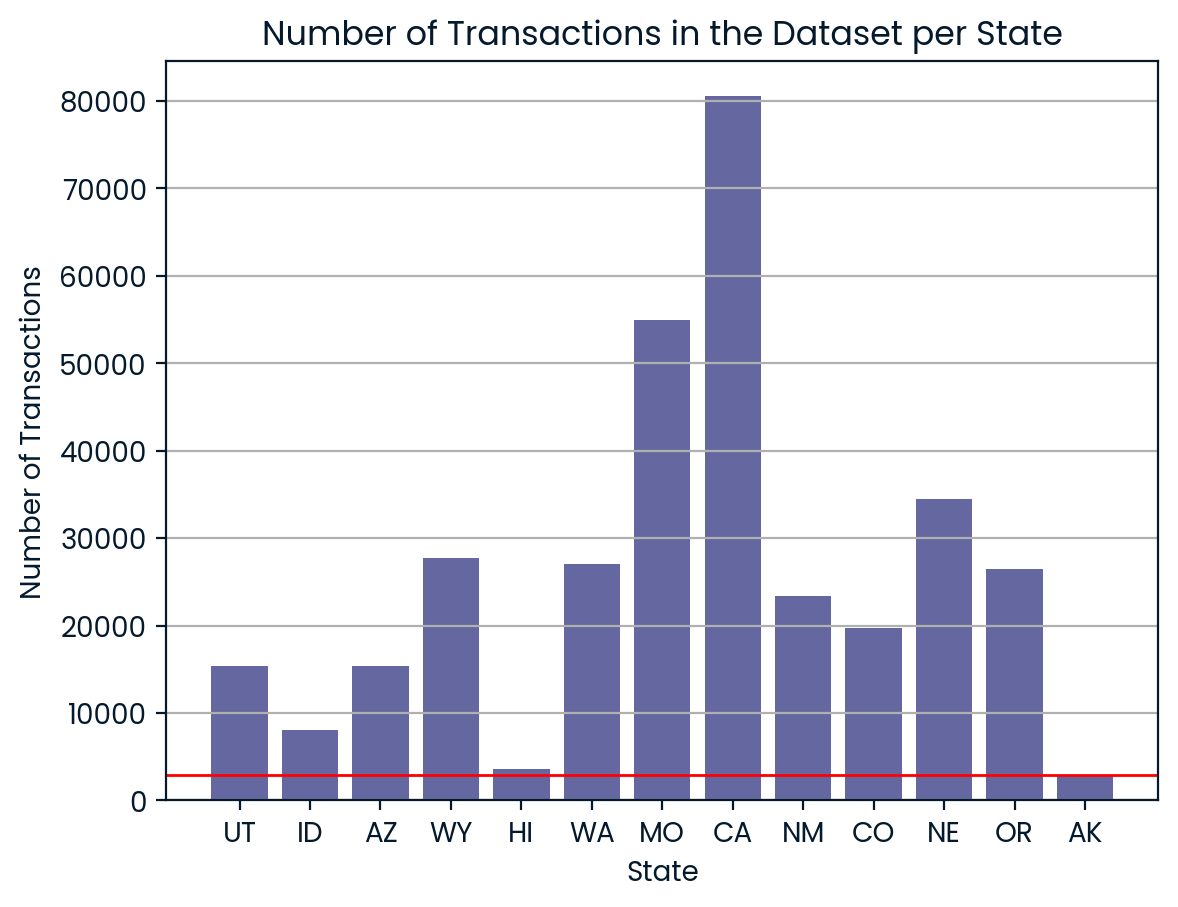

In [31]:
# CELL 13

# Create an ordering to the states
state_order = ['UT','ID','AZ','WY','HI','WA','MO','CA','NM','CO','NE','OR','AK']

# Count the number of transactions per state according to the specified order
transactions_per_state = df['state'].value_counts().reindex(state_order)

# Plotting the number of transactions per state using matplotlib
plt.bar(transactions_per_state.index, transactions_per_state.values)
plt.title('Number of Transactions in the Dataset per State')  # Adding a title to the plot
plt.xlabel('State')  # Labeling the x-axis
plt.ylabel('Number of Transactions')  # Labeling the y-axis
plt.xticks(rotation=0)  # Rotating x-axis labels to make them readable

# Getting the number of transactions from Alaska
ak_transactions = transactions_per_state['AK']
# Drawing a thin horizontal line at the number of transactions from Alaska
plt.axhline(y=ak_transactions, color='r', linestyle='-', linewidth=1)

plt.grid(axis = 'y')
plt.show()

Here, we can see that Alaska is extremely underrepresented in our dataset, with only about 3 thousand transactions, likely due to its small population. One other notable observation is that Hawaii has a similarly small number of transactions being made, yet it maintains a much more reasonable fraud rate. The actual explanation for this discrepancy is either that there are other significant factors that influence fraud rates that are not present in our dataset, or that Alaska is simply and outlier.

In [32]:
# CELL 14

# Create new dataframe containing only geographical information by city
maps = df[['state', 'city', 'lat','long']]

# Same as above, but for state
mapstate = df[['state','lat','long']]

# Keep only one coordinate data per city
maps2 = maps.drop_duplicates(subset='city')
maps2 = maps2.sort_values('city').reset_index().drop(columns='index')

# Keep only one row for each state
mapstate2 = mapstate.drop_duplicates(subset='state')
mapstate2 = mapstate2.sort_values('state').reset_index().drop(columns='index')

mapstate2

# Hard-code the latitudes and longitudes of the centers of each state
state_coords = {
    "AK": [35.2010, 91.8318],
    "AZ": [34.0489, 111.0937],
    "CA": [36.7783, 119.4179],
    "CO": [39.5501, 105.7821],
    "HI": [21.3099, 157.8581],
    "ID": [44.0682, 114.7420],
    "MO": [46.8797, 110.3626],
    "NE": [41.4925, 99.9018],
    "NM": [34.9727, 105.0324],
    "OR": [43.8041, 120.5542]
}
# Convert the dictionary to a DataFrame
state_coords_df = pd.DataFrame.from_dict(state_coords, orient='index', columns=['lat', 'long'])

# Reset index to get the states as a column
state_coords_df.reset_index(inplace=True)
state_coords_df.rename(columns={'index': 'state'}, inplace=True)

mapstate2 = state_coords_df

# Now, maps2 contains a row for each city, containing also its lat and long
# and mapstate2 contains a row for each state, containing also the lat and long of one of its cities

In [33]:
# CELL 15

# Count the quantity of frauds per city then transfer the column of counts to the maps2 dataframe
count = maps['city'].value_counts().rename_axis('city').reset_index(name='counts')
count = count.sort_values('city').reset_index().drop(columns='index')
maps2['count'] = count['counts']
maps2 = maps2.sort_values('count')

# Count the quantity of fraudulent purchases per state
fraud_count_per_state = maps_with_fraud[maps_with_fraud['is_fraud'] == 1]['state'].value_counts().rename_axis('state').reset_index(name='fraud_count')
fraud_count_per_state = fraud_count_per_state.sort_values('state').reset_index().drop(columns='index')
mapstate2 = mapstate2.merge(fraud_count_per_state, on='state', how='left')
mapstate2['fraud_count'] = mapstate2['fraud_count'].fillna(0).astype(int)

In [34]:
# CELL 16

# Calculate the number of transactions per state in the maps_with_fraud dataframe
transactions_per_state = maps_with_fraud['state'].value_counts().rename_axis('state').reset_index(name='transactions_count')

# Merge this count with the mapstate2 dataframe
mapstate2 = mapstate2.merge(transactions_per_state, on='state', how='left')

# Calculate each state's fraud rate based on fraud_count divided by the number of transactions
mapstate2['fraud_rate'] = mapstate2['fraud_count'] / mapstate2['transactions_count']

mapstate2

state      lat      long  fraud_count  transactions_count  fraud_rate
0    AK  35.2010   91.8318           50                2963    0.016875
1    AZ  34.0489  111.0937           64               15362    0.004166
2    CA  36.7783  119.4179          402               80495    0.004994
3    CO  39.5501  105.7821          115               19766    0.005818
4    HI  21.3099  157.8581           16                3649    0.004385
5    ID  44.0682  114.7420           33                8035    0.004107
6    MO  46.8797  110.3626          262               54904    0.004772
7    NE  41.4925   99.9018          216               34425    0.006275
8    NM  34.9727  105.0324          121               23427    0.005165
9    OR  43.8041  120.5542          197               26408    0.007460

In [35]:
# CELL 17

# Calculate fraud rate and append it to the dataframe
mapstate2['fraud_rate'] = df.groupby('state')['is_fraud'].mean().reindex(mapstate2['state']).values

# Plot the data with fraud rate
import plotly.express as px

mapstate2['text'] = mapstate2['state'] + ' Fraud Rate: ' + (mapstate2['fraud_rate']*100).round(2).astype(str) + '%'

# Dynamically create limits based on quartiles of fraud rate to reflect the data more accurately
state_fraud_rate_quartiles = mapstate2['fraud_rate'].quantile([0.25, 0.5, 0.75]).tolist()
state_limits = [(0, state_fraud_rate_quartiles[0]), (state_fraud_rate_quartiles[0], state_fraud_rate_quartiles[1]), (state_fraud_rate_quartiles[1], state_fraud_rate_quartiles[2]), (state_fraud_rate_quartiles[2], 1)]
state_colors = ["royalblue","crimson","lightseagreen","orange"]

# Calculate fraud rate as fraud_count / transactions_count
mapstate2['fraud_rate'] = mapstate2['fraud_count'] / mapstate2['transactions_count']

# Create a choropleth map to visualize fraud rate by state using red for the color base
fig = px.choropleth(mapstate2,
                    locations='state', 
                    locationmode="USA-states", 
                    color='fraud_rate',
                    hover_name='state', 
                    hover_data=['fraud_count', 'transactions_count'],
                    color_continuous_scale=px.colors.sequential.Reds,
                    scope="usa",
                    title='State-wise Fraud Rate in the USA')

fig.show()

In [36]:
# CELL 18

# Calculate fraud rate and append it to the dataframe
maps2['fraud_rate'] = df.groupby('city')['is_fraud'].mean().reindex(maps2['city']).values

# Plot the data with fraud rate
maps2['text'] = maps2['city'] + ' Fraud Rate: ' + (maps2['fraud_rate']*100).round(2).astype(str) + '%'

# Dynamically create limits based on quartiles of fraud rate to reflect the data more accurately
fraud_rate_quartiles = maps2['fraud_rate'].quantile([0.25, 0.5, 0.75]).tolist()
limits = [(0, fraud_rate_quartiles[0]), (fraud_rate_quartiles[0], fraud_rate_quartiles[1]), (fraud_rate_quartiles[1], fraud_rate_quartiles[2]), (fraud_rate_quartiles[2], 1)]
colors = ["royalblue","crimson","lightseagreen","orange"]

fig = go.Figure()

for i, limit in enumerate(limits):
    maps_sub = maps2[(maps2['fraud_rate'] > limit[0]) & (maps2['fraud_rate'] <= limit[1])]
    # Adjust marker size for visibility
    maps_sub['adjusted_size'] = (maps_sub['fraud_rate']*1000) + 10
    maps_sub.loc[maps_sub['fraud_rate'] == 1, 'adjusted_size'] = 50  # Reduce size for 100% fraud rate
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = maps_sub['long'],
        lat = maps_sub['lat'],
        text = maps_sub['text'],
        marker = dict(
            size = maps_sub['adjusted_size'],
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = 'Fraud Rate: {0}% - {1}%'.format(round(limit[0],4), round(limit[1],4))
    ))
fig.update_layout(
        title_text = 'Credit Card Fraud Rate by City (Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
            countrycolor = 'rgb(40, 40, 40)',  # Attempt to make state borders darker
            countrywidth = 1.5,  # Adjust the width of the state borders
            subunitcolor = "rgb(100, 100, 100)",  # Correct property to make state borders darker
            subunitwidth = 1.5  # Adjust the width of the state borders
        ),
        legend = dict(
            title = 'Fraud Rate Ranges',
            itemsizing = 'constant',
            traceorder = 'normal'
        )
    )

fig.show()

It's hard to identify any correlations between geographical location and fraud rate, but what is notable is how several cities are shown to have a fraud rate of 100%, which needs to be examined:

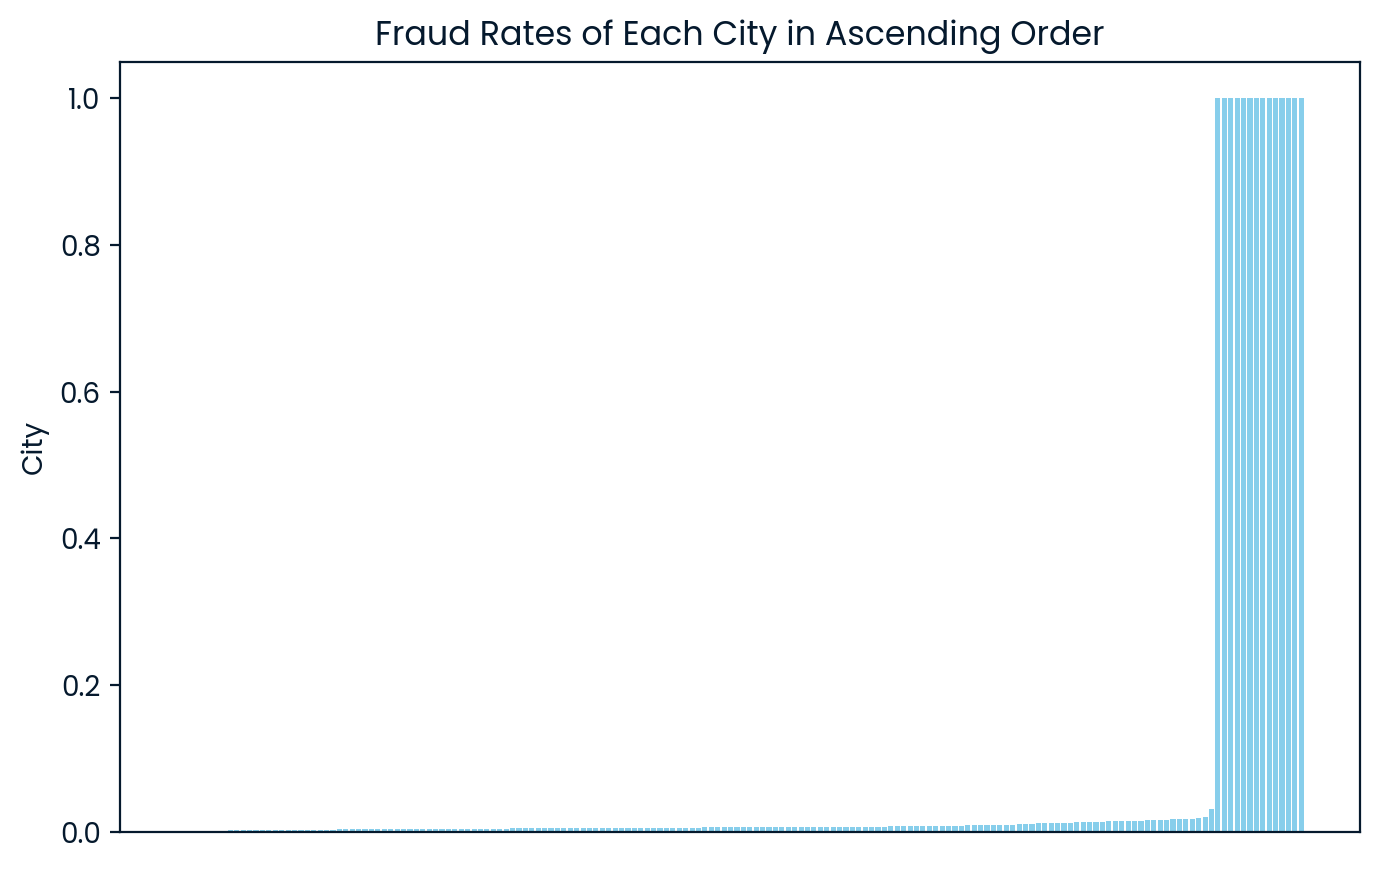

In [37]:
# CELL 19

# Sort the dataframe by fraud_rate in ascending order
maps2_sorted = maps2.sort_values(by='fraud_rate', ascending=True)

# Create a bar graph
plt.figure(figsize=(8, 5))
plt.bar(maps2_sorted['city'], maps2_sorted['fraud_rate'], color='skyblue')
plt.ylabel('City')
plt.xticks([])
plt.title('Fraud Rates of Each City in Ascending Order')
plt.show()

Here, we can see that there's a massive spike in fraud rates of the cities when plotted in order of ascending fraud rate. In fact, there's a huge jump from about 2% immediately to 100%, with no observations in between. As for the cause of this phenomenon, the likely suspect is having a low number of transactions in each of these cities:

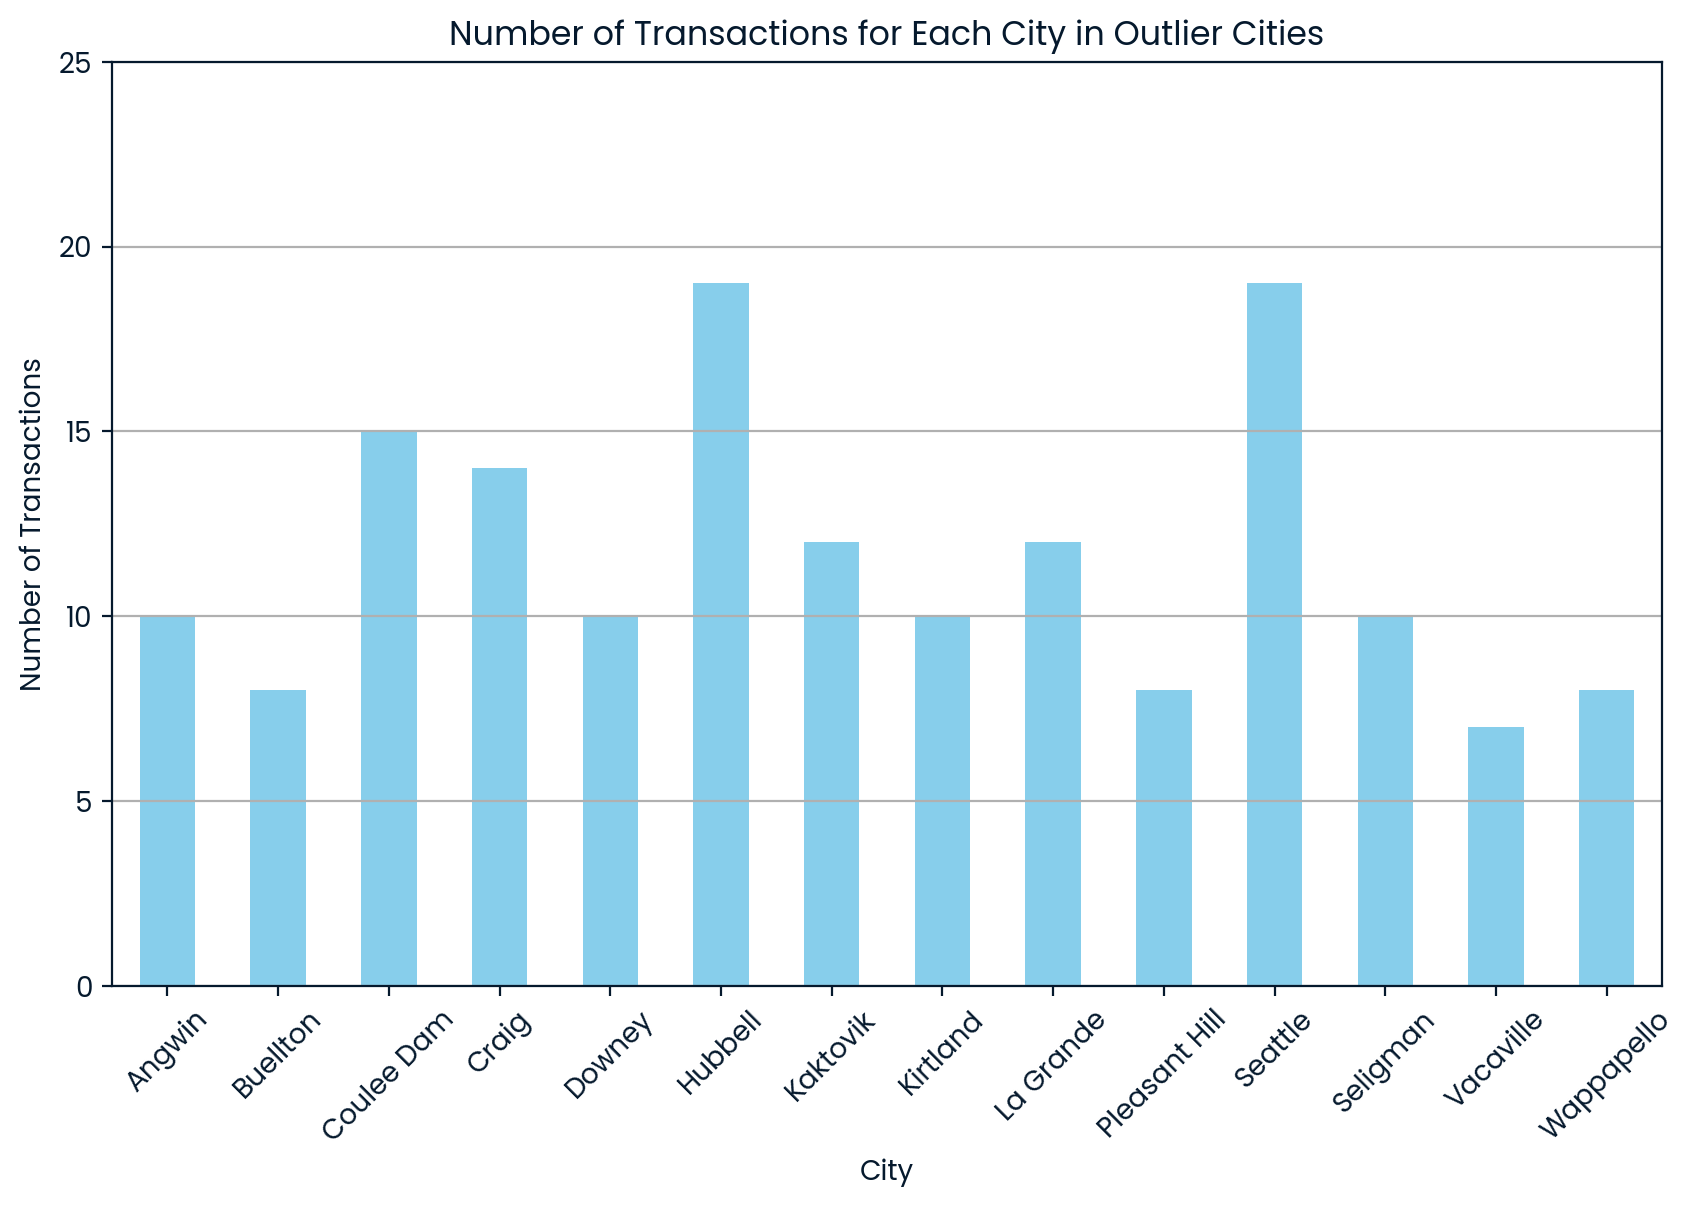

In [38]:
# CELL 20

# Filter outlier cities into a new dataframe
outlier_cities = maps2[maps2['fraud_rate'] > 0.50]

# Plot the number of transactions for the outlier cities
outlier_cities.groupby('city')['count'].sum().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Transactions for Each City in Outlier Cities')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.ylim(0, 25)  # Setting upper bound of y-axis to 20
plt.grid(axis='y')  # Adding horizontal grid lines
plt.show()

Here, we can see that these "Outlier Cities" have no more than 20 transactions in each of them, making them very seccesptible to being outliers. In fact, from a crime theory standpoint, this makes sense, as a fraud perpetrator would likely make many purchases in quick succession in a town, so if this town is extremely small, the perpetrator would have the only recorded transactions in these locations.

In [39]:
# CELL 21
#set the dataframe to analyze the relation between older people and the quantity of frauds
old = df.copy()
old['dob'] = pd.to_datetime(old['dob']).dt.year
old['dob'] = 2022 - old['dob']
old.sort_values('dob')

trans_date_trans_time  ... state_pop_sum
186251   2020-02-22 19:15:55  ...    3592863501
37187    2019-04-14 00:39:15  ...    3592863501
4230     2019-01-14 12:23:48  ...    3592863501
312500   2020-11-29 14:30:02  ...    3592863501
19418    2019-03-02 16:02:01  ...    3592863501
...                      ...  ...           ...
34056    2019-04-06 16:21:58  ...   15382576759
174970   2020-01-17 16:41:15  ...   15382576759
124955   2019-10-17 00:14:22  ...   15382576759
30276    2019-03-28 11:51:28  ...   15382576759
194978   2020-03-16 20:35:37  ...   15382576759

[339607 rows x 16 columns]

In [103]:
# CELL 22
#copying the dataset
fraud = df.copy()
fraud['fraud_rate'] = df.groupby('city')['is_fraud'].mean().reindex(fraud['city']).values
fraud = fraud[fraud['fraud_rate'] <= 0.50]
fraud

trans_date_trans_time  ... fraud_rate
0        2019-01-01 00:00:44  ...   0.001605
1        2019-01-01 00:00:51  ...   0.010884
2        2019-01-01 00:07:27  ...   0.005914
3        2019-01-01 00:09:03  ...   0.003765
4        2019-01-01 00:21:32  ...   0.005125
...                      ...  ...        ...
339602   2020-12-31 23:57:56  ...   0.006809
339603   2020-12-31 23:58:04  ...   0.003191
339604   2020-12-31 23:59:07  ...   0.005011
339605   2020-12-31 23:59:15  ...   0.001917
339606   2020-12-31 23:59:24  ...   0.006826

[339445 rows x 17 columns]

Now that we have a filtered data set we can try different machine learning models on the training data to find the best model for fraud prediction. This can prove to be helpful for instances of predicting fraud as it happens.

In [104]:
# CELL 23
#Convert the time columns from object type to int type.
fraud['trans_date_trans_time'] = pd.to_datetime(fraud['trans_date_trans_time']).dt.hour
fraud['dob'] = pd.to_datetime(fraud['dob']).dt.year
fraud['dob'].info()

<class 'pandas.core.series.Series'>
Int64Index: 339445 entries, 0 to 339606
Series name: dob
Non-Null Count   Dtype
--------------   -----
339445 non-null  int64
dtypes: int64(1)
memory usage: 5.2 MB


In [105]:
# CELL 24
#select the columns to predict the fraud
fraud.columns

fraud_features = ['trans_date_trans_time','category','amt','state','city',
       'city_pop','state_pop_sum','dob', 'lat','long']

X = fraud[fraud_features] 
y = fraud['is_fraud']
       

X.head()

trans_date_trans_time       category     amt  ...   dob      lat      long
0                      0    grocery_pos  107.23  ...  1978  48.8878 -118.2105
1                      0  entertainment  220.11  ...  1962  42.1808 -112.2620
2                      0    grocery_pos   96.29  ...  1945  41.6125 -122.5258
3                      0   shopping_pos    7.77  ...  1967  32.9396 -105.8189
4                      0       misc_pos    6.85  ...  1967  43.0172 -111.0292

[5 rows x 10 columns]

In [106]:
# CELL 25

#Encode the categorical types
from sklearn.preprocessing import OrdinalEncoder

s = (X.dtypes == 'object')
object_cols = list(s[s].index)
object_cols
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])

X                          

trans_date_trans_time  category     amt  ...   dob      lat      long
0                           0       4.0  107.23  ...  1978  48.8878 -118.2105
1                           0       0.0  220.11  ...  1962  42.1808 -112.2620
2                           0       4.0   96.29  ...  1945  41.6125 -122.5258
3                           0      12.0    7.77  ...  1967  32.9396 -105.8189
4                           0       9.0    6.85  ...  1967  43.0172 -111.0292
...                       ...       ...     ...  ...   ...      ...       ...
339602                     23       6.0   12.68  ...  1939  64.7556 -165.6723
339603                     23       7.0   13.02  ...  1958  41.5403 -122.9366
339604                     23       5.0   43.77  ...  1966  40.4931  -91.8912
339605                     23       7.0   86.88  ...  1981  46.1966 -118.9017
339606                     23      13.0    7.99  ...  1965  44.6255 -116.4493

[339445 rows x 10 columns]

In [107]:
#Cell 26

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

In [108]:
# CELL 27

classifiers = [
    ('LinearSVC', LinearSVC(random_state=0, C=1.0)),
    ('K-Nearest Neighbor (Adjusted Parameters)', KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto')),
    ('K-Nearest Neighbor (Default Parameters)', KNeighborsClassifier()),
    ('Random Forest (Adjusted Parameters)', RandomForestClassifier(random_state=1, n_estimators=300, max_depth=8, min_samples_split=2, min_samples_leaf=1)),
    ('Random Forest (Default Parameters)', RandomForestClassifier(random_state=1)),
    ('Neural Network', MLPClassifier(random_state=0, max_iter=1000)),
    ]

X_test,X_train,y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = None
best_accuracy = 0
for name, model in classifiers:
    print(name)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = (name,model)
    cr_model = classification_report(y_test,y_pred)
    print(cr_model)
    cm_model = confusion_matrix(y_test,y_pred)
    print(cm_model)

print(f"Best Model: {best_model[0]} With an accuracy score of ", best_accuracy)

LinearSVC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    270277
           1       0.00      0.00      0.00      1279

    accuracy                           1.00    271556
   macro avg       0.50      0.50      0.50    271556
weighted avg       0.99      1.00      0.99    271556

[[270277      0]
 [  1279      0]]
K-Nearest Neighbor (Adjusted Parameters)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    270277
           1       0.48      0.13      0.20      1279

    accuracy                           1.00    271556
   macro avg       0.74      0.56      0.60    271556
weighted avg       0.99      1.00      0.99    271556

[[270096    181]
 [  1114    165]]
K-Nearest Neighbor (Default Parameters)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    270277
           1       0.39      0.11      0.17      1279

    accuracy         

The best model predicted 743 instances of fraud with 58 false positive frauds.
Finding a good model to predict fraudulent data is important for needing to predict future trends. Using the best model can be helpful by saving the model and its parameters using joblib/pickle and deploying it on a similar, different, data set that needs fraudulent data predictions. However, this is out of the scope for this course. Instead I can use the best model on our existing data set to analyze the performance of our best model

In [112]:
y_pred_existing = best_model[1].predict(X)  # Predict fraud on existing data
print("Predicted Labels:", y_pred_existing)
print("Actual Labels:", y)


Predicted Labels: [0 0 0 ... 0 0 0]
Actual Labels: 0         0
1         0
2         0
3         0
4         0
         ..
339602    0
339603    0
339604    0
339605    0
339606    0
Name: is_fraud, Length: 339445, dtype: int64


Fraud Predicted Count: 1084
Fraud Actual Count: 1620
Non-Fraud Predicted Count: 337767
Non-Fraud Actual Count: 337825


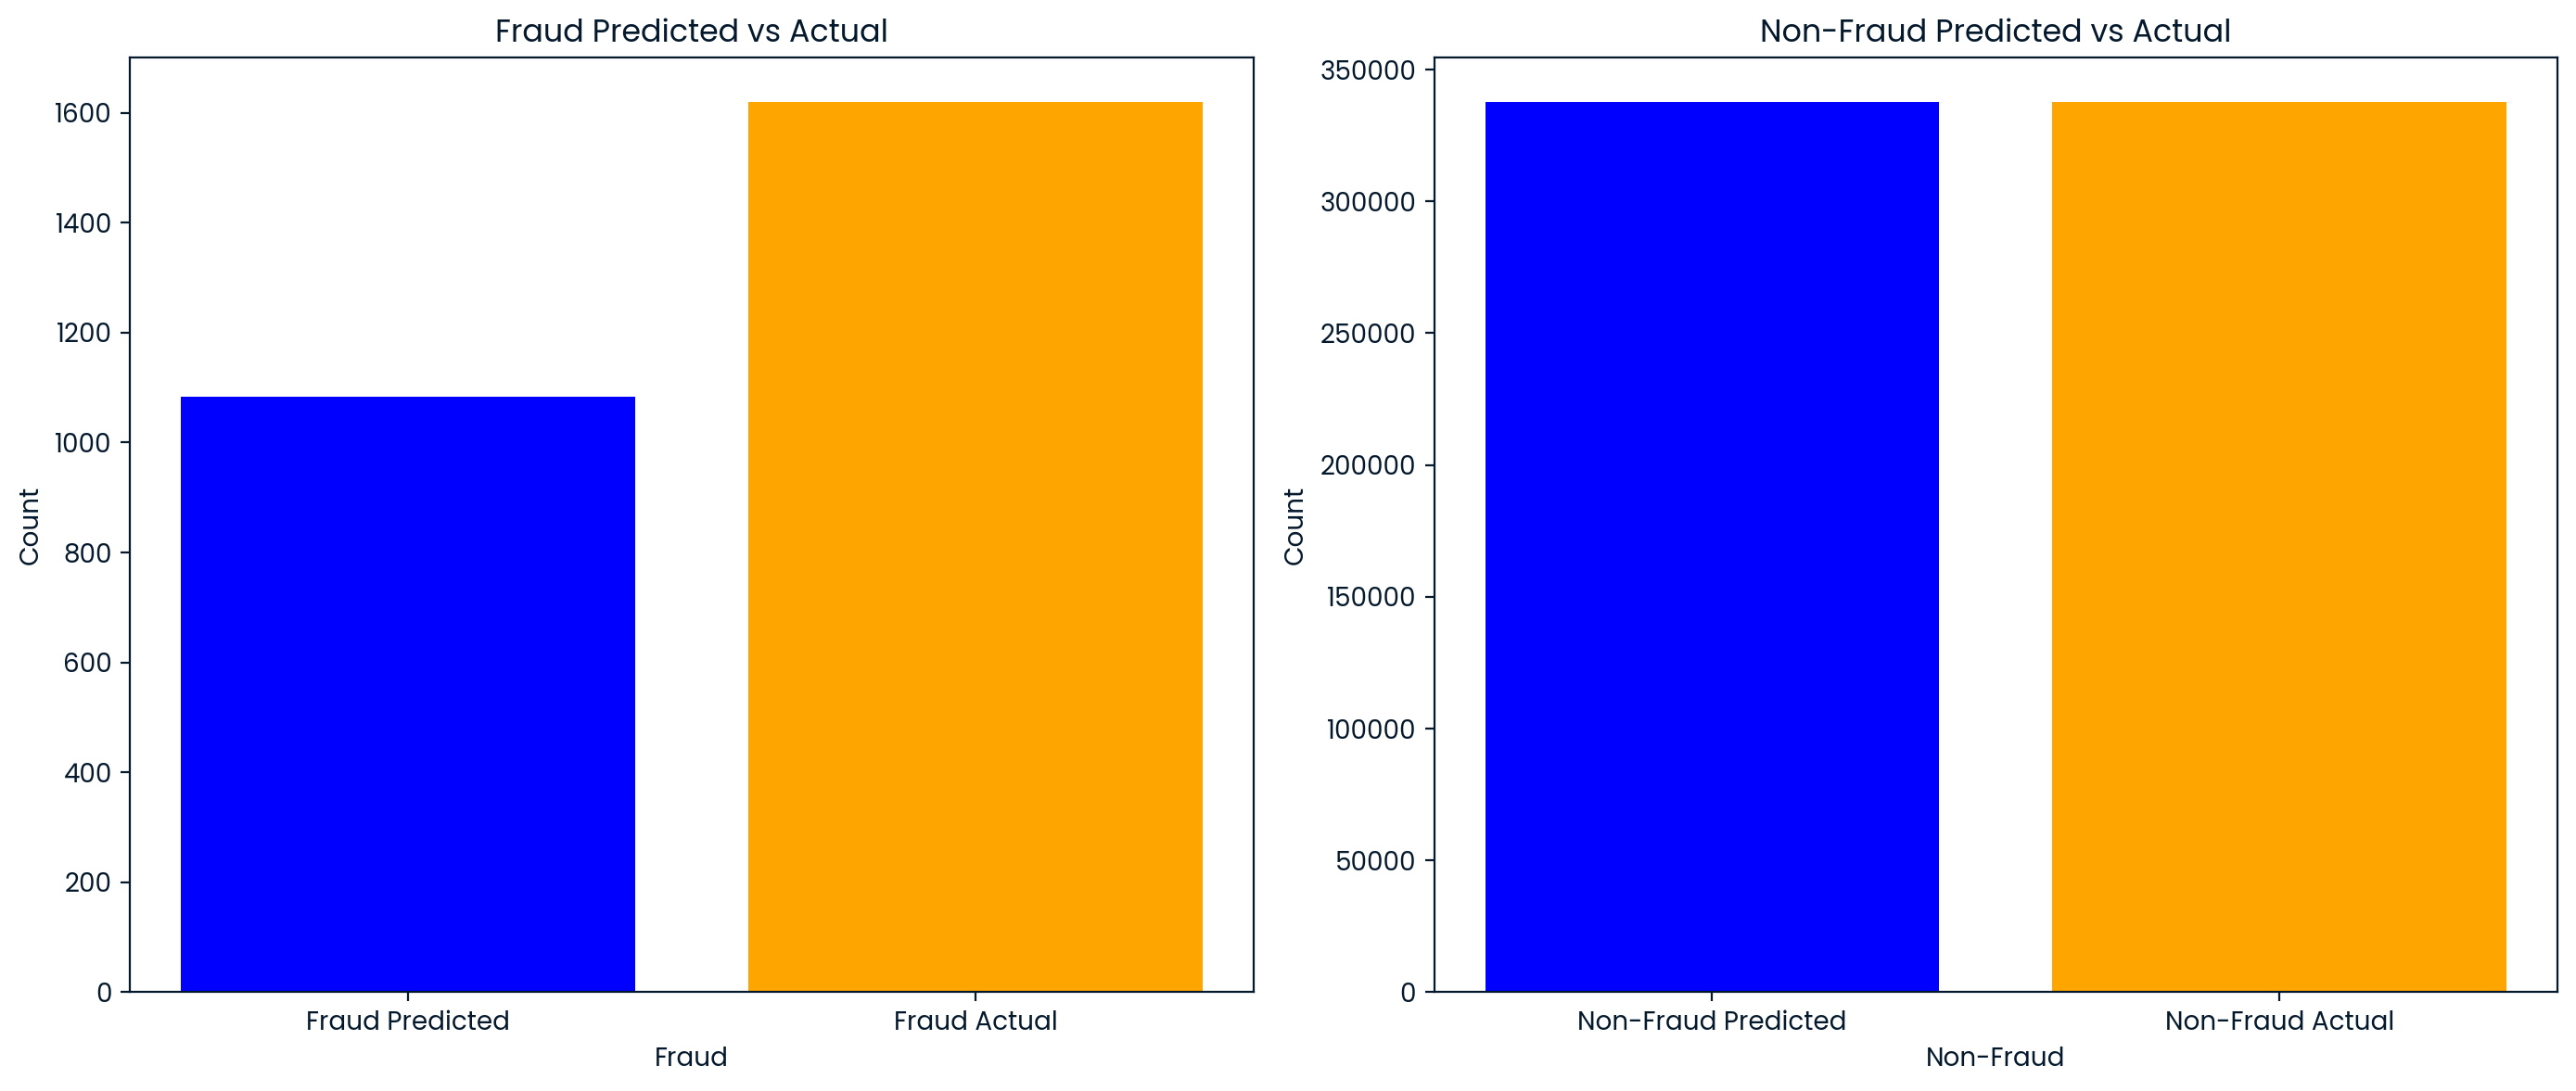

In [110]:

fraud_predicted_count = np.sum((y_pred_existing == 1) & (y == 1))
fraud_actual_count = np.sum(y == 1)
non_fraud_predicted_count = np.sum((y_pred_existing == 0) & (y == 0))
non_fraud_actual_count = np.sum(y == 0)
print("Fraud Predicted Count:", fraud_predicted_count)
print("Fraud Actual Count:", fraud_actual_count)
print("Non-Fraud Predicted Count:", non_fraud_predicted_count)
print("Non-Fraud Actual Count:", non_fraud_actual_count)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for fraud predictions vs actuals
axes[0].bar(['Fraud Predicted', 'Fraud Actual'], [fraud_predicted_count, fraud_actual_count], color=['blue', 'orange'])
axes[0].set_xlabel('Fraud')
axes[0].set_ylabel('Count')
axes[0].set_title('Fraud Predicted vs Actual')

# Plot for non-fraud predictions vs actuals
axes[1].bar(['Non-Fraud Predicted', 'Non-Fraud Actual'], [non_fraud_predicted_count, non_fraud_actual_count], color=['blue', 'orange'])
axes[1].set_xlabel('Non-Fraud')
axes[1].set_ylabel('Count')
axes[1].set_title('Non-Fraud Predicted vs Actual')

plt.tight_layout()
plt.show()

We can see that the model does a very good job of predicting no case of fraud but underperforms a bit when predicting cases of fraud. However, this is very general of a count. We really should be breaking it down into the different parameters that play a factor into the prediction but since this it isnt the best to test the data on a model with existing fraudulent data used to test the data, we cant go further into it unless given new data that would accurately be able to test the performance of the model.